![ieseg logo](./img/ieseg.png)

#### MBD 2019-2020
# Statistical & Machine Learning Approaches for Marketing

## Section 1: Introduction & Linear Regression

**1. Import all required libraries and datasets**

In [1]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(mlr)         # ML toolkit
library(caret)       # ML toolkit
library(ggplot2)     # Visualization

# Import data
library(ISLR)      # Data from the course book
library(MASS)      # Boston housing dataset
library(datasets)  # US crime dataset

# Resize plot
library(repr)  # String and binary representations
#options(repr.plot.width=4, repr.plot.height=4)

R.version.string

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'mlr' was built under R version 3.6.3"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'caret'

The following object is masked from 'package:mlr':

    train

Warning message:
"package 'ISLR' was built under R version 3.6.3"

[1] "R version 3.6.1 (2019-07-05)"

In [2]:
# Install missing packages
# install.packages("ISLR")

In [2]:
# Import Advertising data
adv <- read.csv('./data/Advertising.csv', row.names=1)
head(adv)

TV,radio,newspaper,sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,9.3
151.5,41.3,58.5,18.5
180.8,10.8,58.4,12.9
8.7,48.9,75.0,7.2


## Exercise 2

**Chapter 2** : Excercise 2

a) Regression problem - inference; `n=500`, `p=4`  
b) Classification problem - prediction; `n=20`, `p=14`  
c) Regression problem - prediction; `n=53`, `p=4` 

**Chapter 2** : Excercise 10

In [5]:
library(MASS)
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
dim(Boston)

[1] 506  14

In [7]:
colnames(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

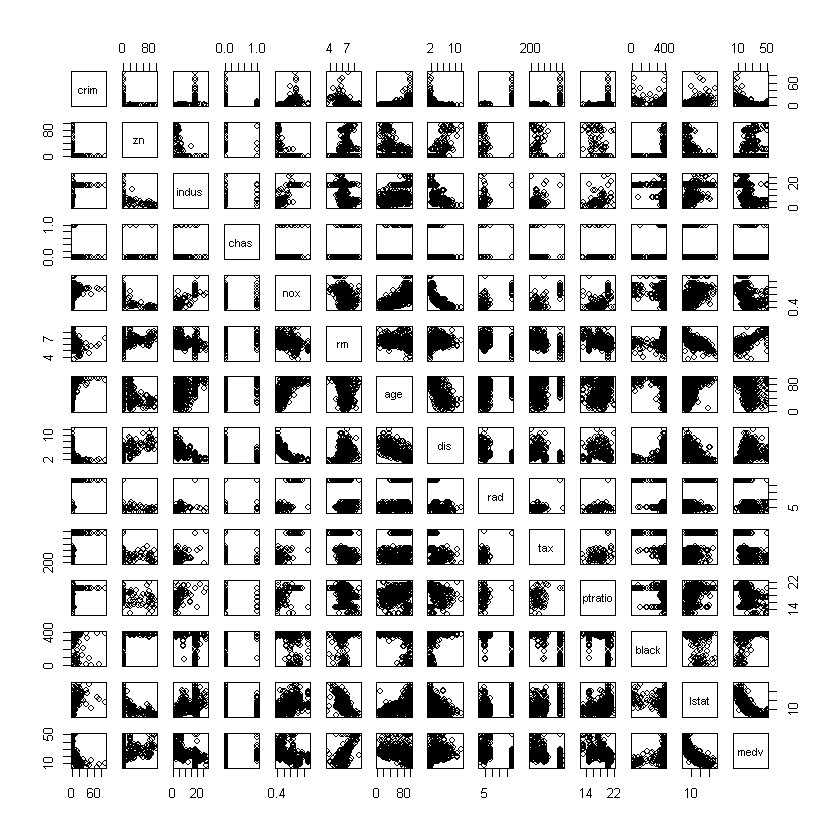

In [8]:
pairs(Boston)

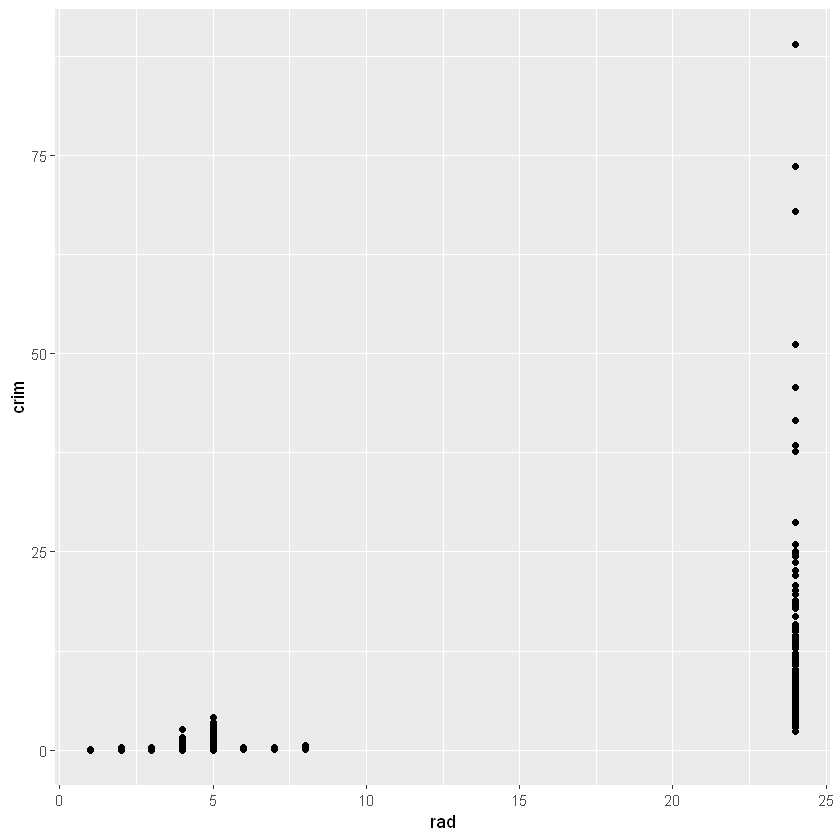

In [9]:
ggplot(Boston,aes(rad,crim))+geom_point()

Conclusion - more crime!

**Chapter 3** : Excercise 3

**a)**

i) False

ii) Correct

iii) False

iv) Correct

**b)**

In [12]:
y <- 50+20*4+0.07*110+35*1+0.01*4*110-10*4*1
y

[1] 137.1

**c)**  
False

**Chapter 3** : Excercise 10

In [13]:
library(ISLR)
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


**a)**

In [15]:

lm.fit=lm(Sales ~ Price + Urban + US, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**b)**

In [16]:
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**c)**

In [18]:
contrasts(Carseats$Urban)
contrasts(Carseats$US)

,Yes
No,0
Yes,1


,Yes
No,0
Yes,1


**d)**

Reject the null hypotheses

**e)**

In [20]:
lm.fit2=lm(Sales~Price+US,Carseats)
lm.fit2


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Coefficients:
(Intercept)        Price        USYes  
   13.03079     -0.05448      1.19964  


**f)**

In [21]:
anova(lm.fit,lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
396,2420.835,NA,NA,NA,NA
397,2420.874,-1,-0.03979039,0.00650891,0.9357389


**g)**

In [22]:
confint(lm.fit2)

,2.5 %,97.5 %
(Intercept),11.79032020,14.27126531
Price,-0.06475984,-0.04419543
USYes,0.69151957,1.70776632


**Chapter 3** : Excercise 15

**a)**

In [24]:
fix(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

**b)**

In [26]:
lm.fit=lm(crim~., data=Boston)
summary(lm.fit)


Call:
lm(formula = crim ~ ., data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.924 -2.120 -0.353  1.019 75.051 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17.033228   7.234903   2.354 0.018949 *  
zn            0.044855   0.018734   2.394 0.017025 *  
indus        -0.063855   0.083407  -0.766 0.444294    
chas         -0.749134   1.180147  -0.635 0.525867    
nox         -10.313535   5.275536  -1.955 0.051152 .  
rm            0.430131   0.612830   0.702 0.483089    
age           0.001452   0.017925   0.081 0.935488    
dis          -0.987176   0.281817  -3.503 0.000502 ***
rad           0.588209   0.088049   6.680 6.46e-11 ***
tax          -0.003780   0.005156  -0.733 0.463793    
ptratio      -0.271081   0.186450  -1.454 0.146611    
black        -0.007538   0.003673  -2.052 0.040702 *  
lstat         0.126211   0.075725   1.667 0.096208 .  
medv         -0.198887   0.060516  -3.287 0.001087 ** 
---
Signif. codes:  0 '***' 0.0

**c)**

In [28]:
lm_2.fit=lm(medv ~ zn, data=Boston)
summary(lm_2.fit)


Call:
lm(formula = medv ~ zn, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.918  -5.518  -1.006   2.757  29.082 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.91758    0.42474  49.248   <2e-16 ***
zn           0.14214    0.01638   8.675   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.587 on 504 degrees of freedom
Multiple R-squared:  0.1299,	Adjusted R-squared:  0.1282 
F-statistic: 75.26 on 1 and 504 DF,  p-value: < 2.2e-16


**d)**

In [29]:
lm_3.fit=lm(medv ~ rm, data=Boston)
summary(lm_3.fit)
confint(lm_3.fit)


Call:
lm(formula = medv ~ rm, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.346  -2.547   0.090   2.986  39.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -34.671      2.650  -13.08   <2e-16 ***
rm             9.102      0.419   21.72   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.616 on 504 degrees of freedom
Multiple R-squared:  0.4835,	Adjusted R-squared:  0.4825 
F-statistic: 471.8 on 1 and 504 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-39.876641,-29.464601
rm,8.278855,9.925363


In [34]:
lm_4.fit=lm(medv ~ age, data=Boston)
summary(lm_4.fit)
confint(lm_4.fit)


Call:
lm(formula = medv ~ age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.097  -5.138  -1.958   2.397  31.338 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.97868    0.99911  31.006   <2e-16 ***
age         -0.12316    0.01348  -9.137   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.527 on 504 degrees of freedom
Multiple R-squared:  0.1421,	Adjusted R-squared:  0.1404 
F-statistic: 83.48 on 1 and 504 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),29.0157516,32.94160395
age,-0.1496469,-0.09667852


In [33]:
lm_5.fit=lm(medv ~ lstat, data=Boston)
summary(lm_5.fit)
confint(lm_5.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505
